In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Feature Engineering

**Feature engineering** is the process of transforming raw data into useful inputs for machine learning models.
In this notebook, we’ll cover techniques like encoding categorical features, normalizing and standardizing data, handling missing values, and creating polynomial features.

Table of contents:

- [Encoding categorical features](#1.-Enconding-categorical-features)
- [Normalization and Standardization](#2.-Normalization-and-Standardization)
- [Data imputation](#3.-Data-imputation)
- [Polynomial features](#4.-Polynomial-features)

Let’s load the Titanic dataset, which contains information about passengers aboard the Titanic.

In [2]:
# load titanic dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/titanic.csv'
df = pd.read_csv(path ,index_col = 'PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


| Column Name    | Description |
|----------------|-------------|
| **PassengerId** | Unique ID for each passenger |
| **Survived**    | Survival (0 = No, 1 = Yes) |
| **Pclass**      | Passenger class (1st, 2nd, 3rd) |
| **Name**        | Name of the passenger |
| **Sex**         | Gender of the passenger |
| **Age**         | Age of the passenger |
| **SibSp**       | Number of siblings/spouses aboard |
| **Parch**       | Number of parents/children aboard |
| **Ticket**      | Ticket number |
| **Fare**        | Ticket fare |
| **Cabin**       | Cabin number |
| **Embarked**    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

Features can be classified as numerical or categorical:

- **Numerical features** represent quantities or measurements. Examples include `Age`, `Fare`, `SibSp`, and `Parch`.
- **Categorical features** represent categories or groups. Examples include `Sex`, `Pclass`, and `Embarked`.

Numerical features are used directly in most models, while categorical features often need to be encoded into numerical values for the model to process them effectively.

## 1. Enconding categorical features

- [Ordinal encoding](#1.1.-Ordinal-encoding)
- [One hot encoding](#1.2.-One-hot-encoding)

Often, features are not continuous values but categorical.
For example, a person might have features like `["male", "female"]`, `["from Europe", "from US", "from Asia"]`, `["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]`.
These categories can be turned into numbers.

### 1.1. Ordinal encoding

An **ordinal feature** is a categorical feature where the values have a natural order or ranking. 
For example, in the Titanic dataset, `Pclass` (passenger class) is an ordinal feature because the classes—1st, 2nd, and 3rd—have a meaningful order (1st class is higher than 3rd class).

**Ordinal encoding** is the process of converting these ordered categories into numbers that reflect their ranking.
For example, 1st class might be encoded as 1, 2nd class as 2, and 3rd class as 3. 
This allows the model to understand the relative importance of the categories.

In [3]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

We will first ordinal encode the `Sex` feature. 
Although there is no natural order between categories like "male" and "female," ordinal encoding can still be applied to convert these categories into numerical values. 
Keep in mind, for unordered features like this, ordinal encoding may not always be the best choice, and other encoding techniques like one-hot encoding could be more appropriate.

In [4]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [5]:
# Instantiate the OrdinalEncoder and specify the category order
encoder = OrdinalEncoder(categories=[['male','female']])  # Explicitly set the order: male < female
# Fit and transform the Sex column
encoder.fit_transform(df[['Sex']])

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Notice that "male" has been encoded as 0 and "female" as 1.
If we set the `categories` parameter the other way around using `categories=[['female', 'male']]`, the encoded values would be reversed, with "female" encoded as 0 and "male" as 1.

Let’s look at another example of ordinal encoding. This time, we’ll encode the Embarked feature. Again, keep in mind that the categories ("C" for Cherbourg, "Q" for Queenstown, and "S" for Southampton) don’t have a natural order

In [6]:
df.Embarked.value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Notice that there are a few NaN values in the Embarked feature. 
Before we apply encoding, we need to decide how to handle these missing values. 
In this case, we will simply drop the rows with missing values.

In [7]:
df.dropna(axis=0,subset='Embarked', inplace=True)

In [8]:
df.Embarked.value_counts(dropna=False)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

We will encode 'S' as 0, 'C' as 1, and 'Q' as 2.

In [9]:
encoder = OrdinalEncoder(categories=[['S','C','Q']])
encoder.fit_transform(df[['Embarked']])

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

We can encode multiple features at the same time. For example, if we want to encode both the `Sex` and `Embarked` features together, we can pass both columns to the encoder and define the categories for each feature.

In [10]:
categories = [
    ['male','female'],
    ['S','C','Q']
]
encoder = OrdinalEncoder(categories=categories)
encoder.fit_transform(df[['Sex','Embarked']])

array([[0., 0.],
       [1., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 2.]])

We get a matrix with two columns. 
The first column contains the encoding for `Sex`.
The second column contains the encoding for `Embarked`.

### 1.2. One hot encoding

**One-hot encoding** is a technique used to convert categorical features into a binary format
. Instead of assigning a single number to each category (as in ordinal encoding), one-hot encoding creates a new binary column for each category.
Each row contains a 1 in the column corresponding to its category and 0s in the other columns. 
This method is particularly useful when there’s no natural order between categories, ensuring the model doesn’t assume any ranking among them.

In the code below, we’re using `OneHotEncoder` to convert the `Sex` feature into a one-hot encoded format. 
By default, one-hot encoding generates a sparse matrix, which is memory-efficient because it only stores non-zero values.
However, sparse matrices can be difficult to visualize directly.
By setting `sparse_output=False`, we ensure the encoder outputs a dense matrix, which is easier to view and interpret.
While we don't generally need `sparse_output=False` in most cases, here we use it to clearly see the one-hot encoded values.

In [11]:
# One-hot encoding of the "Sex" feature
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit_transform(df[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

The result is a matrix with two columns, where each column represents one of the categories in the `Sex` feature.
One column corresponds to "male" and the other to "female". 
For each row, a 1 indicates the presence of that category, and a 0 indicates its absence.

If you're unsure of the order of the categories after encoding, you can use `encoder.categories_` to check.
This attribute shows the categories that were detected and used for the encoding.

In [12]:
encoder.categories_

[array(['female', 'male'], dtype=object)]

In [13]:
# One-hot encoding of the "Embarked" feature
encoder.fit_transform(df[['Embarked']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [14]:
encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

This time, we get a matrix with three columns, each representing a category in the Embarked feature: "C" (Cherbourg), "Q" (Queenstown), and "S" (Southampton). 
For each row, a 1 is placed in the column for the passenger’s embarkation point, with 0s in the other columns.

We can encode multiple columns at once.

In [15]:
# One-hot encoding of the "Sex" and "Embarked" features
encoder.fit_transform(df[['Sex','Embarked']])

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [16]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

This time, we get a matrix with five columns.
The first two columns represent the one-hot encoding of the `Sex` feature, while the remaining three columns represent the `Embarked` feature.

Both the `OrdinalEncoder` and `OneHotEncoder` in scikit-learn come with useful hyperparameters that are worth exploring.
For example:

- `handle_unknown`: Allows you to handle unseen categories during prediction, which can be important when the test data includes categories not present in the training data.
- `min_frequency` and `max_categories`: These parameters help reduce the number of categories by grouping infrequent ones together, which can simplify the model and improve performance.

Make sure to check out these hyperparameters in the scikit-learn documentation ([OneHotEncoder documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [OrdinalEncoder documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)) to understand how they can help manage categorical data more effectively.

## 2. Normalization and Standardization 

Normalization and standardization are ways to adjust numerical features so they are on the same scale. We’ll show how to use these methods with the Age and Fare features from the Titanic dataset.

- [Normalization](#2.1.-Normalization)
- [Standardization](#2.2.-Standardization)

### 2.1. Normalization

**Normalization** is the process of scaling numerical features so that their values fit within a standard range, usually between [0, 1] or [-1, 1]. This can be done using tools like `MinMaxScaler` (for the range [0, 1]) or `MaxAbsScaler` (for the range [-1, 1]).

- **MinMaxScaler** formula (range [0, 1]):

$$
X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

- **MaxAbsScaler** formula (range [-1, 1]):

$$
X_{\text{scaled}} = \frac{X}{|X_{\text{max}}|}
$$

While normalizing data isn’t always required, it can help speed up training and improve the performance of some machine learning models.

Let’s take a look at the `Fare` column.
Its values range from 0 to approximately 512.

In [17]:
df.Fare.min(), df.Fare.max()

(0.0, 512.3292)

In [18]:
# # MinMax scaler scales data to the [0, 1] range

# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMaxScaler to the Fare column
fare_scaled = scaler.fit_transform(df[['Fare']])

# Check the min and max values of the scaled array
print(f"Min value after scaling: {np.min(fare_scaled)}")
print(f"Max value after scaling: {np.max(fare_scaled)}")

Min value after scaling: 0.0
Max value after scaling: 1.0


### 2.2. Standardization

**Standardization** is the process of scaling features so that they have a **mean of 0** and a **standard deviation of 1**. This transforms the data to resemble a standard normal distribution. The formula for standardization is:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:
- $X$ is the original value,
- $\mu$ is the mean of the feature, and
- $\sigma$ is the standard deviation of the feature.

Let’s apply **Standardization** to the `Age` column and compare its distribution before and after scaling:

Text(0, 0.5, 'Frequency')

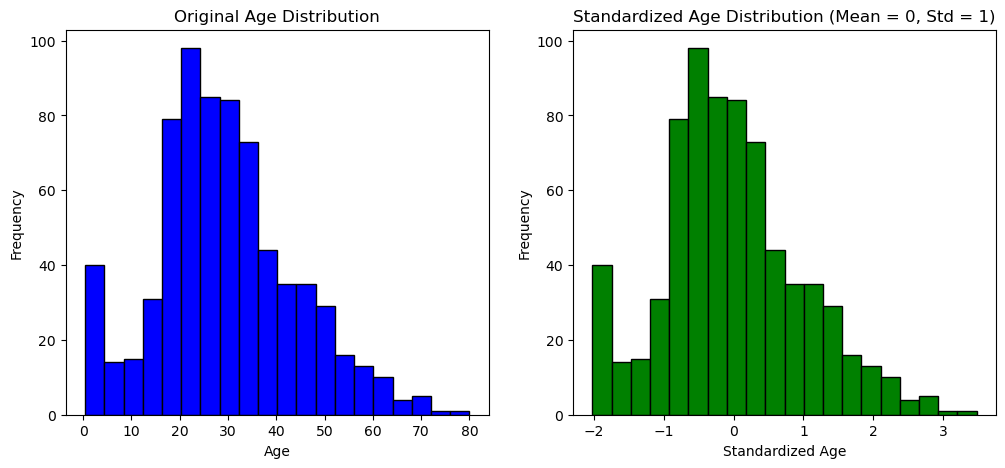

In [19]:
from sklearn.preprocessing import StandardScaler

# Extract the Age column as a NumPy array
age = df[['Age']].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the Age column
age_standardized = scaler.fit_transform(age)

# Plot the distribution of Age before and after standardization
plt.figure(figsize=(12, 5))

# Original Age distribution
plt.subplot(1, 2, 1)
plt.hist(age, bins=20, color='blue', edgecolor='black')
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Standardized Age distribution
plt.subplot(1, 2, 2)
plt.hist(age_standardized, bins=20, color='green', edgecolor='black')
plt.title('Standardized Age Distribution (Mean = 0, Std = 1)')
plt.xlabel('Standardized Age')
plt.ylabel('Frequency')

After standardization, the values are rescaled to have a mean of 0 and a standard deviation of 1. 
While the overall shape of the distribution remains the same, the scale has changed so that the `Age` values are now centered around 0, with most values falling between -2 and 3, reflecting standard normal distribution properties.

Scikit-learn offers several other scaling-normalization techniques that you might want to explore, depending on your data and the model you’re using.
For more details on when and how to apply these scalers, check out the [Scikit-learn documentation on preprocessing.](https://scikit-learn.org/stable/modules/preprocessing.html)

## 3. Data Imputation

**Data Imputation** is the process of handling missing values in a dataset by filling them with estimated or calculated values. 
Instead of removing rows with missing data, imputation allows you to retain the entire dataset by replacing the missing values with techniques like filling in the mean, median, mode, or using more advanced methods.

Let’s check which columns in the Titanic dataframe contain missing values.

In [20]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

It looks like `Age` (a numerical column) and `Embarked` (a categorical column) are the ones with missing values.

The `SimpleImputer` class provides basic strategies for imputing missing values by either filling them with a constant value or using statistical measures like the mean, median, or most frequent value for each column.
For numerical columns, imputation is often done using the mean or median, while for categorical columns, the most frequent category is typically used.

In [21]:
from sklearn.impute import SimpleImputer

Let’s now impute the missing values in the `Age` column using the median value.

In [22]:
df.Age.median()

28.0

In [23]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer using the median strategy
imputer = SimpleImputer(strategy='median')

# Impute the missing values in the Age column (NaNs will be replaced with the median, 28)
df['Age'] = imputer.fit_transform(df[['Age']])

Let’s now impute the missing values in the `Embarked` column using the most frequent category.

In [24]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values in the Embarked column (NaNs will be replaced with the most frequent value, S)
imputer.fit_transform(df[['Embarked']])

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

There are more advanced imputers available in scikit-learn, such as `KNNImputer` and `IterativeImputer`, which can use relationships between features to estimate missing values.
For more details and examples, check out the [scikit-learn documentation on imputation](https://scikit-learn.org/stable/modules/impute.html).

## 4. Polynomial features

Sometimes, adding complexity to a model by considering nonlinear relationships in the data can improve its performance.
A simple and common way to do this is by using polynomial features, which generate higher-order terms and interaction terms from the input features.
This is implemented in the `PolynomialFeatures class`.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

We can create polynomial features from numerical data, so for our example, we'll use the `SibSp`, `Parch`, and `Fare` features.
While `Age` is also numerical, it contains missing values, so we can't use it for our example without imputing those values first.

In the case of polynomial features, we generate new features by raising the original numerical features to different powers and creating interaction terms between them. 
For **degree 2**, we get:

- **Degree 0**: A constant term (intercept).
- **Degree 1**: The original features (`SibSp`, `Parch`, and `Fare`).
- **Degree 2**: Squared terms and interaction terms like `SibSp^2`, `Parch^2`, `Fare^2`, and combinations like `SibSp * Parch`, `SibSp * Fare`, etc.

Let’s create the polynomial features for **degree 2** using the `PolynomialFeatures` class in scikit-learn

In [27]:
# Define the features to use
features = df[['SibSp', 'Parch', 'Fare']]

# Instantiate the PolynomialFeatures class for degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features
poly_features = poly.fit_transform(features)
poly_features

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.25625000e+01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.08130886e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.28056250e+01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 2.00000000e+00, ...,
        4.00000000e+00, 4.69000000e+01, 5.49902500e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.00000000e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.00625000e+01]])

In [28]:
poly_features.shape

(889, 10)

We get a matrix with 10 columns because it includes the original features (`SibSp`, `Parch`, `Fare`), their squared terms (`SibSp^2`, `Parch^2`, `Fare^2`), and interaction terms (`SibSp * Parch`, `SibSp * Fare`, `Parch * Fare`), along with the bias term

In [29]:
# Get the names of the polynomial features
poly.get_feature_names_out(['SibSp', 'Parch', 'Fare'])

array(['1', 'SibSp', 'Parch', 'Fare', 'SibSp^2', 'SibSp Parch',
       'SibSp Fare', 'Parch^2', 'Parch Fare', 'Fare^2'], dtype=object)